### 資料清洗、視覺化

In [13]:
# 讀取資料

import pandas as pd
df = pd.read_csv('cpbl_rakuten_05.csv')
df.head(10) #讀取前十筆資料

,日期,場次,對手,打席,打數,得分,安打,全壘打,打點,四壞,故四,觸身,三振,犧觸,犧飛,雙殺,RE24,WPA,打擊率
0,10/24,204,悍,2,1,1,1,0,0,0,0,1,0,0,0,0,0.9,0.0,1.000
1,10/22,234,象,5,5,3,4,0,1,0,0,0,0,0,0,0,1.6,0.1,0.800
2,10/21,220,象,6,6,1,3,0,2,0,0,0,0,0,0,0,1.8,0.1,0.500
3,10/19,174,象,5,5,0,2,0,0,0,0,0,0,0,0,0,0.1,0.0,0.400
4,10/18,172,象,4,3,0,0,0,0,1,0,0,1,0,0,0,-0.2,-0.1,0.000
5,10/15,290,龍,4,4,2,2,0,0,0,0,0,0,0,0,0,0.5,0.0,0.500
6,10/12,284,龍,4,4,0,1,0,0,0,0,0,0,0,0,0,-0.2,0.0,0.250
7,10/10,296,獅,5,4,2,1,1,1,1,0,0,1,0,0,0,0.7,-0.0,0.250
8,10/09,294,悍,4,3,0,2,0,1,0,0,0,0,0,1,0,0.5,-0.0,0.667
9,10/08,292,悍,4,3,1,0,0,0,1,0,0,2,0,0,1,-0.4,0.0,0.000


In [16]:
#特徵工程轉換對手資料

import pandas as pd
from sklearn.preprocessing import LabelEncoder

# 使用 LabelEncoder 將類別型特徵進行標籤編碼
label_encoder = LabelEncoder()
df["對手_encoded"] = label_encoder.fit_transform(df["對手"])

print(df)

        日期   場次 對手  打席  打數  得分  安打  全壘打  打點  四壞  故四  觸身  三振  犧觸  犧飛  雙殺  RE24  \
0    10/24  204  悍   2   1   1   1    0   0   0   0   1   0   0   0   0   0.9   
1    10/22  234  象   5   5   3   4    0   1   0   0   0   0   0   0   0   1.6   
2    10/21  220  象   6   6   1   3    0   2   0   0   0   0   0   0   0   1.8   
3    10/19  174  象   5   5   0   2    0   0   0   0   0   0   0   0   0   0.1   
4    10/18  172  象   4   3   0   0    0   0   1   0   0   1   0   0   0  -0.2   
..     ...  ... ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..  ..   ...   
194  10/20  222  獅   4   3   1   2    0   0   1   0   0   0   0   0   0   1.2   
195  10/19  162  獅   4   2   0   0    0   1   1   0   0   1   0   1   0  -0.2   
196  10/18  234  悍   4   4   0   0    0   0   0   0   0   1   0   0   0  -0.7   
197  10/17  232  悍   5   5   1   1    0   2   0   0   0   0   0   0   0   3.6   
198  10/14  298  龍   5   5   1   1    0   1   0   0   0   0   0   0   0  -1.7   

     WPA    打擊率  對手_encoded

In [12]:
#查看對手欄位的對應編碼

df.head()

,對手,對手_encoded
0,龍,3
1,悍,0
2,象,2
3,獅,1


In [17]:
# 查看資料架構
# 總共199筆資料，沒有空值(已經處理好)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   日期          199 non-null    object 
 1   場次          199 non-null    int64  
 2   對手          199 non-null    object 
 3   打席          199 non-null    int64  
 4   打數          199 non-null    int64  
 5   得分          199 non-null    int64  
 6   安打          199 non-null    int64  
 7   全壘打         199 non-null    int64  
 8   打點          199 non-null    int64  
 9   四壞          199 non-null    int64  
 10  故四          199 non-null    int64  
 11  觸身          199 non-null    int64  
 12  三振          199 non-null    int64  
 13  犧觸          199 non-null    int64  
 14  犧飛          199 non-null    int64  
 15  雙殺          199 non-null    int64  
 16  RE24        199 non-null    float64
 17  WPA         199 non-null    float64
 18  打擊率         199 non-null    float64
 19  對手_encoded  199 non-null    i

In [18]:
# 查看敘述統計值

df.describe()

,場次,打席,打數,得分,安打,全壘打,打點,四壞,故四,觸身,三振,犧觸,犧飛,雙殺,RE24,WPA,打擊率,對手_encoded
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,161.552764,4.050251,3.507538,0.497487,1.080402,0.055276,0.417085,0.452261,0.005025,0.045226,0.457286,0.020101,0.025126,0.095477,0.164322,0.002513,0.299322,1.527638
std,87.462696,0.998730,1.145343,0.716856,0.950049,0.229095,0.732995,0.616673,0.070888,0.231300,0.656694,0.140698,0.156901,0.311285,1.030928,0.144752,0.265779,1.109186
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.600000,-0.400000,0.000000,0.000000
25%,91.000000,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.500000,-0.100000,0.000000,1.000000
50%,172.000000,4.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.250000,2.000000
75%,234.000000,5.000000,4.000000,1.000000,2.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.700000,0.100000,0.500000,2.500000
max,299.000000,6.000000,6.000000,4.000000,4.000000,1.000000,4.000000,3.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000,3.800000,0.400000,1.000000,3.000000


In [4]:
# 查看RE24得分期望值的敘述統計

df['RE24'].describe()

count    199.000000
mean       0.164322
std        1.030928
min       -2.600000
25%       -0.500000
50%        0.100000
75%        0.700000
max        3.800000
Name: RE24, dtype: float64

In [5]:
df['安打'].describe()

count    199.000000
mean       1.080402
std        0.950049
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: 安打, dtype: float64

In [6]:
#列出有缺失值的資料(顯示有空值的資料)
#可以看到這筆資料現在沒有缺失值

condition = df.isnull().any(axis='columns') #any-->任何有空值的資料 ／ #all-->所有欄位都是空值才符合條件
df[condition]

,日期,場次,對手,打席,打數,得分,安打,全壘打,打點,四壞,故四,觸身,三振,犧觸,犧飛,雙殺,RE24,WPA,打擊率


In [ ]:
import pandas as pd

# 假設 df 是你的數據框，且 'category' 是類別型特徵
df_encoded = pd.get_dummies(df, columns=["category"], prefix=["category"])

### 資訊視覺化

1. 與其他四隊對戰數據：呈現跟哪一隊隊戰成績最理想(X：隊伍、Y：平均打擊率)

C:\Users\User\AppData\Local\Temp\ipykernel_24988\2119611357.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['RE24'])


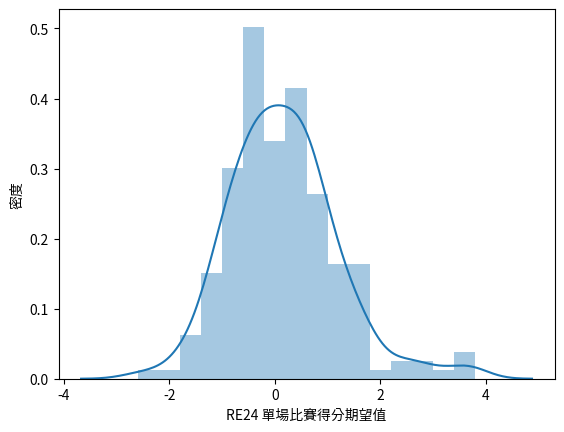

In [7]:
# 常態分佈查看RE24數值的分布情形
# 大多座落於-2～2之間

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.font_manager import fontManager


# 載入中文字體
fontManager.addfont("ChineseFont.ttf")
plt.rc('font', family="ChineseFont")
plt.rcParams['axes.unicode_minus'] = False  # 解決負號無法正確顯示的問題

# 'RE24' 是你要分析的列
sns.distplot(df['RE24'])

# 修改 X、Y 軸的標籤
plt.xlabel('RE24 單場比賽得分期望值')  # 替換成你想要的標籤內容
plt.ylabel('密度')  # 替換成你想要的標籤內容


# 顯示圖表
plt.show()

In [8]:
# 找出RE24 < 0 的比賽場次，共有89場
# 可以解讀為在這89場比賽，他的攻擊表現並未幫助球隊拿下勝利
# 也可以看到當天的打擊率是相對低的，安打數是0或是1

low_RE24 = df[df['RE24'] < 0]
low_RE24

,日期,場次,對手,打席,打數,得分,安打,全壘打,打點,四壞,故四,觸身,三振,犧觸,犧飛,雙殺,RE24,WPA,打擊率
4,10/18,172,象,4,3,0,0,0,0,1,0,0,1,0,0,0,-0.2,-0.1,0.00
6,10/12,284,龍,4,4,0,1,0,0,0,0,0,0,0,0,0,-0.2,0.0,0.25
9,10/08,292,悍,4,3,1,0,0,0,1,0,0,2,0,0,1,-0.4,0.0,0.00
11,10/03,282,龍,4,4,0,0,0,0,0,0,0,3,0,0,0,-0.9,-0.0,0.00
12,10/01,280,獅,4,3,0,0,0,0,1,0,0,0,0,0,0,-0.7,-0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,10/23,155,象,4,4,0,1,0,0,0,0,0,0,0,0,0,-0.2,-0.1,0.25
193,10/22,153,龍,6,5,0,1,0,0,1,0,0,0,0,0,1,-1.0,-0.3,0.20
195,10/19,162,獅,4,2,0,0,0,1,1,0,0,1,0,1,0,-0.2,-0.0,0.00
196,10/18,234,悍,4,4,0,0,0,0,0,0,0,1,0,0,0,-0.7,-0.2,0.00


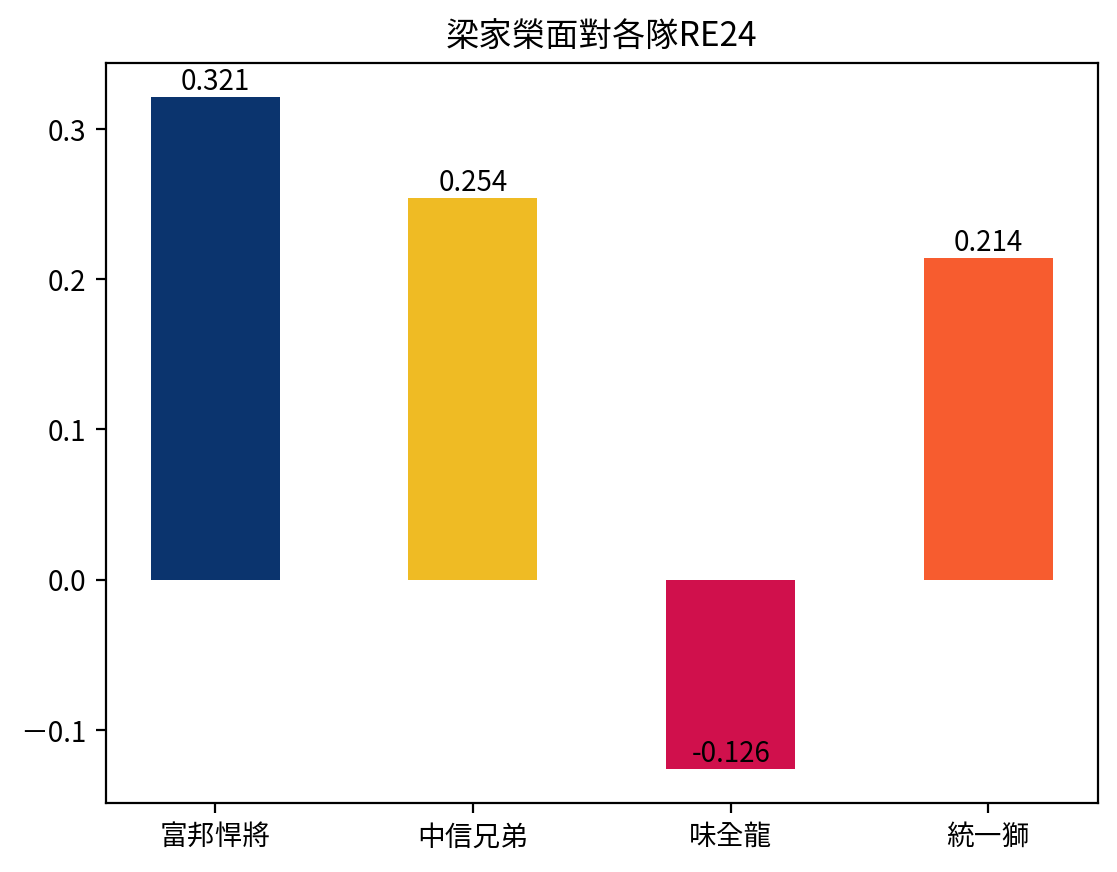

In [22]:
# 單獨抓出跟中職其他四隊對戰數據 (RE24值的比較)
# 可以看到面對味全龍的RE24是負數，這可以解讀：他面對味全龍的時候，表現是面對中職其他四隊最差(下一張圖)

#對戰富邦
fubon = df[df['對手'] == '悍']
fubon_RE24_mean = fubon['RE24'].mean()
fubon_RE24_mean

#對戰兄弟
brothers = df[df['對手'] == '象']
brothers_RE24_mean = brothers['RE24'].mean()
brothers_RE24_mean

#對戰龍
drogans = df[df['對手'] == '龍']
drogans_RE24_mean = drogans['RE24'].mean()
drogans_RE24_mean

#對戰獅
lions = df[df['對手'] == '獅']
lions_RE24_mean = lions['RE24'].mean()
lions_RE24_mean

# 繪製長條圖，比較梁家榮選手跟各隊對戰的打擊率
# 對戰打擊率最佳的是統一獅，最差的是味全龍

import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from matplotlib.font_manager import fontManager

#載入中文字體
fontManager.addfont("ChineseFont.ttf")
plt.rc('font', family="ChineseFont")

listx = ['富邦悍將', '中信兄弟', '味全龍', '統一獅']
listy = [fubon_RE24_mean,brothers_RE24_mean, drogans_RE24_mean,  lions_RE24_mean]
plt.title('梁家榮面對各隊RE24')
bars = plt.bar(listx, listy, width=0.5, color=['#0B346E','#EFBB24','#D0104C','#F75C2F'])
for bar, yval in zip(bars, listy):
    plt.text(bar.get_x() + bar.get_width() / 2 + 0.001, bar.get_height() + 0.005, round(yval, 3), ha='center', color='black')

plt.show()

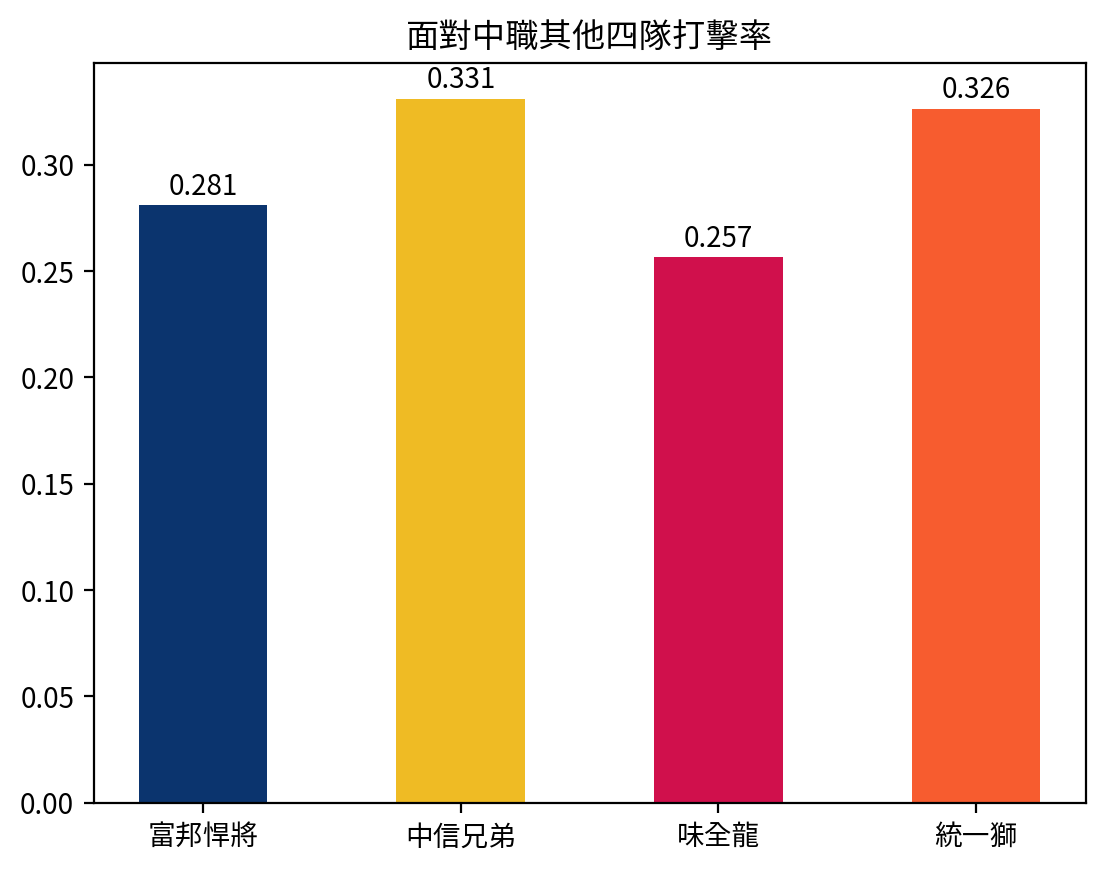

In [23]:
# 單獨抓出跟中職其他四隊對戰數據

#對戰富邦
fubon = df[df['對手'] == '悍']
fubon_svg_mean = fubon['打擊率'].mean()
fubon_svg_mean

#對戰兄弟
brothers = df[df['對手'] == '象']
brothers_svg_mean = brothers['打擊率'].mean()
brothers_svg_mean

#對戰龍
drogans = df[df['對手'] == '龍']
drogans_svg_mean = drogans['打擊率'].mean()
drogans_svg_mean

#對戰獅
lions = df[df['對手'] == '獅']
lions_svg_mean = lions['打擊率'].mean()
lions_svg_mean

# 繪製長條圖，比較梁家榮選手跟各隊對戰的打擊率
# 對戰打擊率最佳的是統一獅，最差的是味全龍

import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from matplotlib.font_manager import fontManager

#載入中文字體
fontManager.addfont("ChineseFont.ttf")
plt.rc('font', family="ChineseFont")

listx = ['富邦悍將', '中信兄弟', '味全龍', '統一獅']
listy = [fubon_svg_mean,brothers_svg_mean, drogans_svg_mean,  lions_svg_mean]
plt.title('面對中職其他四隊打擊率')
bars = plt.bar(listx, listy, width=0.5, color=['#0B346E','#EFBB24','#D0104C','#F75C2F'])
for bar, yval in zip(bars, listy):
    plt.text(bar.get_x() + bar.get_width() / 2 + 0.001, bar.get_height() + 0.005, round(yval, 3), ha='center', color='black')

plt.show()

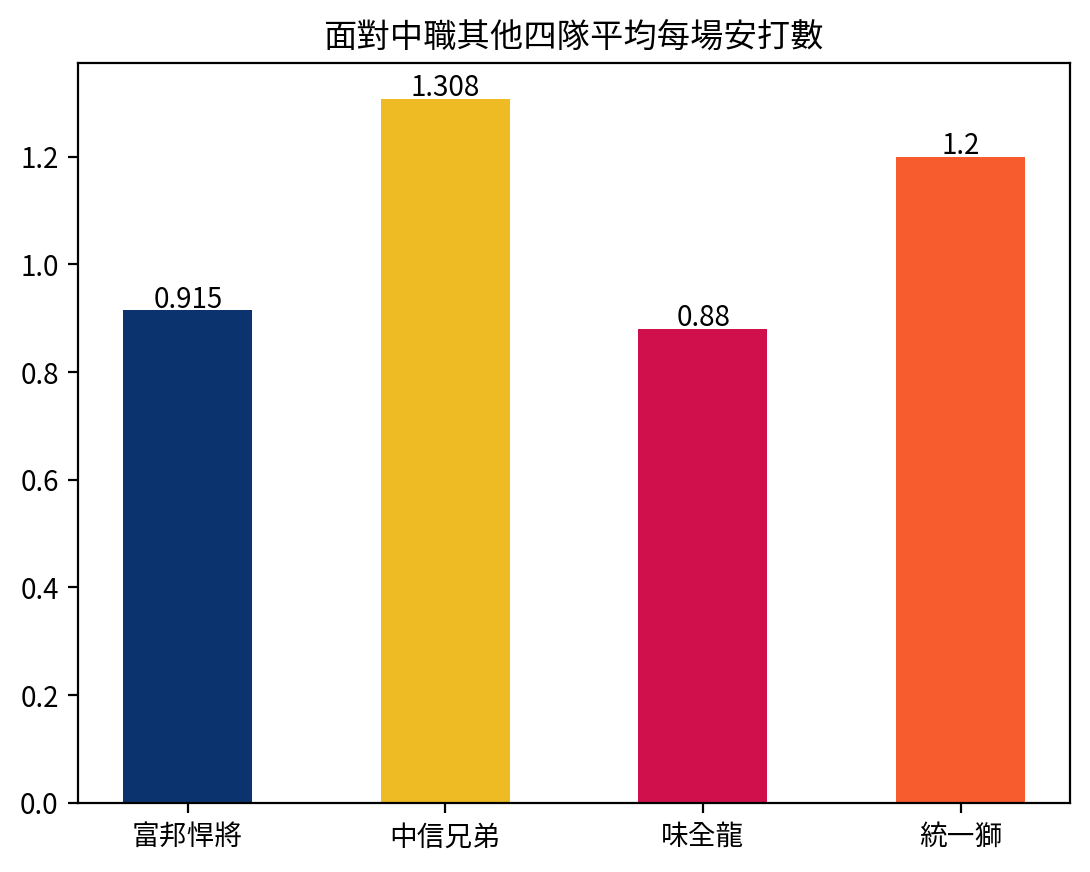

In [24]:
# 單獨抓出跟中職其他四隊對戰數據

#對戰富邦
fubon = df[df['對手'] == '悍']
fubon_svg_mean = fubon['安打'].mean()
fubon_svg_mean

#對戰兄弟
brothers = df[df['對手'] == '象']
brothers_svg_mean = brothers['安打'].mean()
brothers_svg_mean

#對戰龍
drogans = df[df['對手'] == '龍']
drogans_svg_mean = drogans['安打'].mean()
drogans_svg_mean

#對戰獅
lions = df[df['對手'] == '獅']
lions_svg_mean = lions['安打'].mean()
lions_svg_mean

# 繪製長條圖，比較梁家榮選手跟各隊對戰的打擊率
# 對戰打擊率最佳的是統一獅，最差的是味全龍

import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from matplotlib.font_manager import fontManager

#載入中文字體
fontManager.addfont("ChineseFont.ttf")
plt.rc('font', family="ChineseFont")

listx = ['富邦悍將', '中信兄弟', '味全龍', '統一獅']
listy = [fubon_svg_mean,brothers_svg_mean, drogans_svg_mean,  lions_svg_mean]
plt.title('面對中職其他四隊平均每場安打數')
bars = plt.bar(listx, listy, width=0.5, color=['#0B346E','#EFBB24','#D0104C','#F75C2F'])
for bar, yval in zip(bars, listy):
    plt.text(bar.get_x() + bar.get_width() / 2 + 0.001, bar.get_height() + 0.005, round(yval, 3), ha='center', color='black')

plt.show()

#### 計算皮爾森相關係數

In [19]:
# 刪除csv檔中的日期、對手欄位

import pandas as pd

new_df = df.drop(['日期', '對手'], axis=1)

new_df

,場次,打席,打數,得分,安打,全壘打,打點,四壞,故四,觸身,三振,犧觸,犧飛,雙殺,RE24,WPA,打擊率,對手_encoded
0,204,2,1,1,1,0,0,0,0,1,0,0,0,0,0.9,0.0,1.000,0
1,234,5,5,3,4,0,1,0,0,0,0,0,0,0,1.6,0.1,0.800,2
2,220,6,6,1,3,0,2,0,0,0,0,0,0,0,1.8,0.1,0.500,2
3,174,5,5,0,2,0,0,0,0,0,0,0,0,0,0.1,0.0,0.400,2
4,172,4,3,0,0,0,0,1,0,0,1,0,0,0,-0.2,-0.1,0.000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,222,4,3,1,2,0,0,1,0,0,0,0,0,0,1.2,0.0,0.667,1
195,162,4,2,0,0,0,1,1,0,0,1,0,1,0,-0.2,-0.0,0.000,1
196,234,4,4,0,0,0,0,0,0,0,1,0,0,0,-0.7,-0.2,0.000,0
197,232,5,5,1,1,0,2,0,0,0,0,0,0,0,3.6,0.3,0.200,0


In [20]:
#計算相關係數

import pandas as pd
featuresCorr = new_df.corr()
featuresCorr

,場次,打席,打數,得分,安打,全壘打,打點,四壞,故四,觸身,三振,犧觸,犧飛,雙殺,RE24,WPA,打擊率,對手_encoded
場次,1.000000,0.091496,0.087331,0.046260,0.053253,0.073832,0.049562,-0.014584,0.074492,-0.012227,-0.009611,-0.035382,0.051979,-0.180774,0.089016,0.000727,0.038856,0.019208
打席,0.091496,1.000000,0.794404,0.282350,0.389608,0.164386,0.240286,0.126920,0.067752,-0.031751,0.034092,0.136542,-0.008098,0.065716,0.102798,0.020083,0.083276,0.062568
打數,0.087331,0.794404,1.000000,0.189176,0.445019,0.104267,0.185736,-0.441039,0.030634,-0.220534,0.065900,-0.032286,-0.155633,0.132546,-0.002124,-0.019916,0.100717,0.038597
得分,0.046260,0.282350,0.189176,1.000000,0.489739,0.385262,0.400891,0.128256,-0.049444,0.046378,-0.120925,-0.099645,-0.066791,-0.078135,0.494318,0.357799,0.382651,-0.033259
安打,0.053253,0.389608,0.445019,0.489739,1.000000,0.257932,0.415761,-0.131344,0.068963,-0.085581,-0.180656,-0.087718,-0.047502,-0.043166,0.618122,0.362102,0.855030,-0.002119
全壘打,0.073832,0.164386,0.104267,0.385262,0.257932,1.000000,0.493606,0.108145,-0.017190,-0.047416,-0.034582,-0.034644,-0.038833,-0.003559,0.406136,0.163318,0.205248,-0.075606
打點,0.049562,0.240286,0.185736,0.400891,0.415761,0.493606,1.000000,0.016339,-0.040540,0.007335,-0.135925,-0.032730,0.127992,-0.042601,0.642028,0.356594,0.343664,-0.091900
四壞,-0.014584,0.126920,-0.441039,0.128256,-0.131344,0.108145,0.016339,1.000000,0.063282,-0.002491,-0.076771,0.069325,0.038558,-0.120841,0.193133,0.049443,-0.032539,0.062854
故四,0.074492,0.067752,0.030634,-0.049444,0.068963,-0.017190,-0.040540,0.063282,1.000000,-0.013931,-0.049612,-0.010178,-0.011409,-0.021853,-0.032089,-0.001237,0.053795,0.030341
觸身,-0.012227,-0.031751,-0.220534,0.046378,-0.085581,-0.047416,0.007335,-0.002491,-0.013931,1.000000,-0.103594,-0.028075,-0.031470,-0.060276,0.023745,0.056927,0.004609,-0.054111


#### 繪製熱力圖

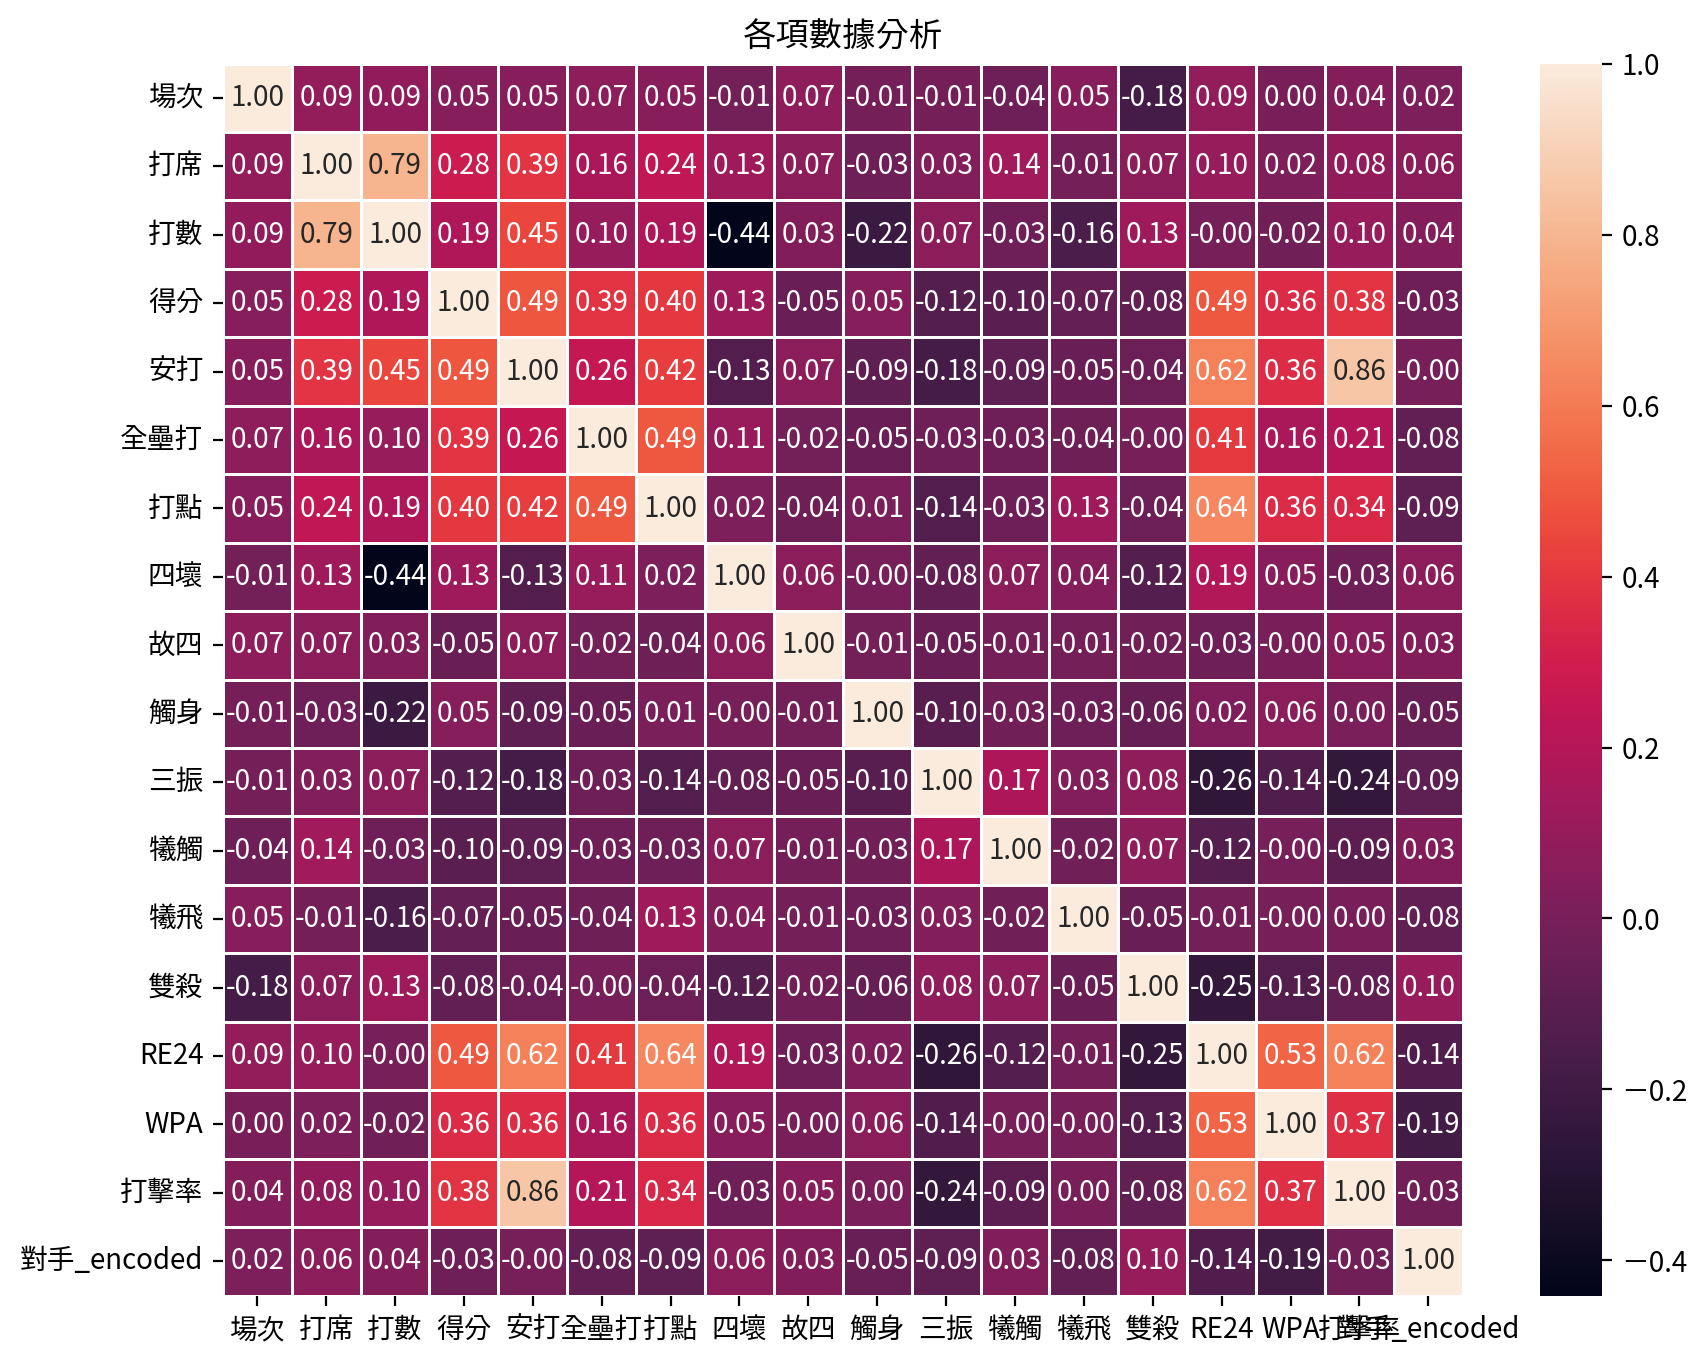

In [25]:
# 將相關係數繪製熱力圖視覺化
# 抓出預測安打數的X特徵

import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = new_df.corr()
%config InlineBackend.figure_format = 'retina'

# 設定中文字體
chinese_font = FontProperties(fname='./TaipeiSansTCBeta-Regular.ttf')
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']

# 繪製熱力圖
plt.figure(figsize=(10, 8))  # 調整圖表大小
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt='.2f', linewidths=.5)
plt.title('各項數據分析')

# 將標籤文字設定為橫向排列
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=0)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)

plt.show()

### 機器學習：多元線性迴歸分析
#### 目標預測值(y)：RE24(得分期望值/情境得分能力，Run Expectancy Matrix)
- 單⼀打席的RE24是這樣計算的：打席完成時球隊的RE - 打席開始前球隊的RE + 球隊得分。
- 透過選⼿的逐打席RE24，我們便能得知該選⼿在某打席為球隊貢獻了多少得分期望值。
- 累積逐打席的RE24，則意味著該選⼿（打者）整體⽽⾔約略為球隊創造過多少得分（或是投⼿省下多少失分）。

#### 自變數(x)：安打數、打點？


#### WPA(勝率增加值，Win Probability Added，WPA)

- 當一名選手的WPA很高，就代表他常常在關鍵時刻敲出能增加球隊勝率的一擊（或投手能在關鍵時刻解決打者）
- 簡單來說，就是心臟大顆

[參考說明](http://jackybaseball.blogspot.com/2020/03/win-expectancy-we.html)



[參考](https://www.youtube.com/watch?v=wm9yR1VspPs&t=7570s)

#### 多元線性回歸預測模型

#### RE24 = w1 * 安打 + w2 * 打點 + w3 * 打擊率

##### Y：RE24
##### X：安打、打點、打擊率

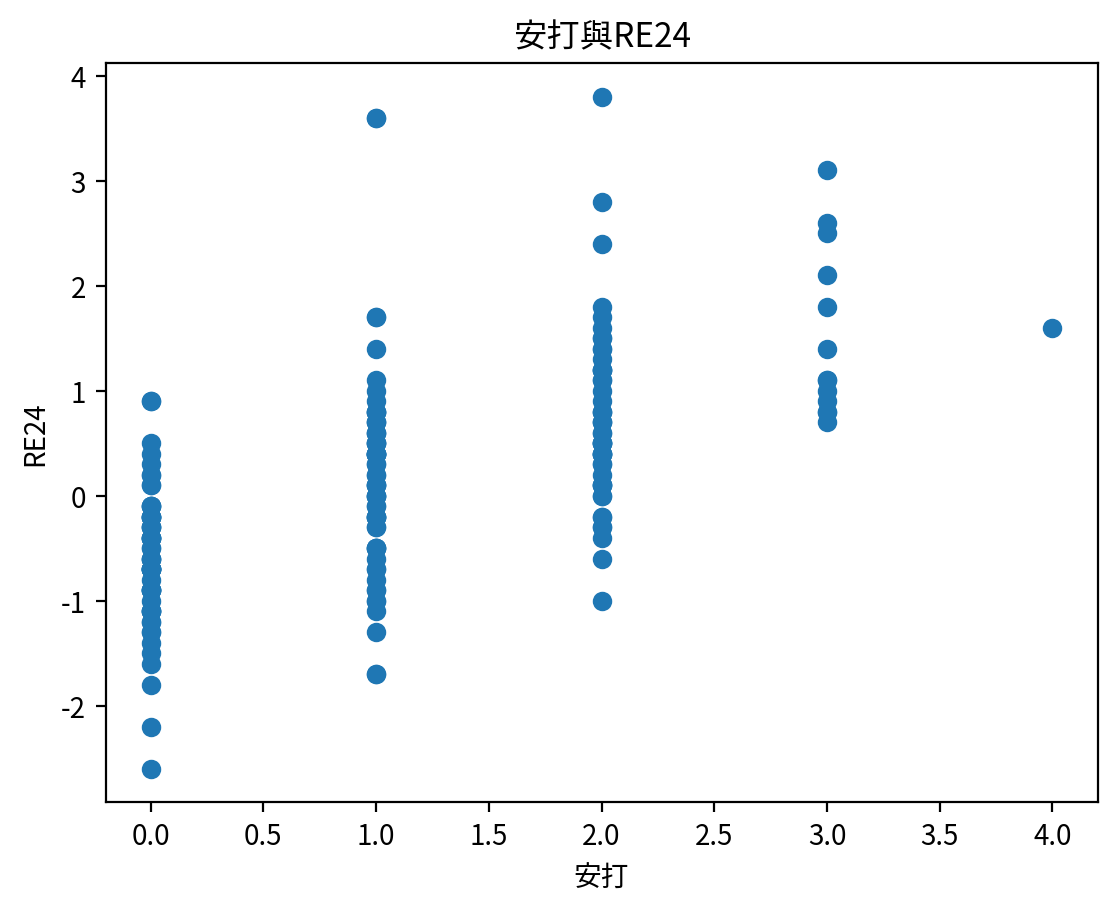

In [143]:
# 先抓出安打與RE24關係的散點圖

import matplotlib.pyplot as plt

x = new_df["安打"]
y = new_df["RE24"]

plt.scatter(x, y)
plt.xlabel("安打")
plt.ylabel("RE24")
plt.title("安打與RE24")
plt.show()

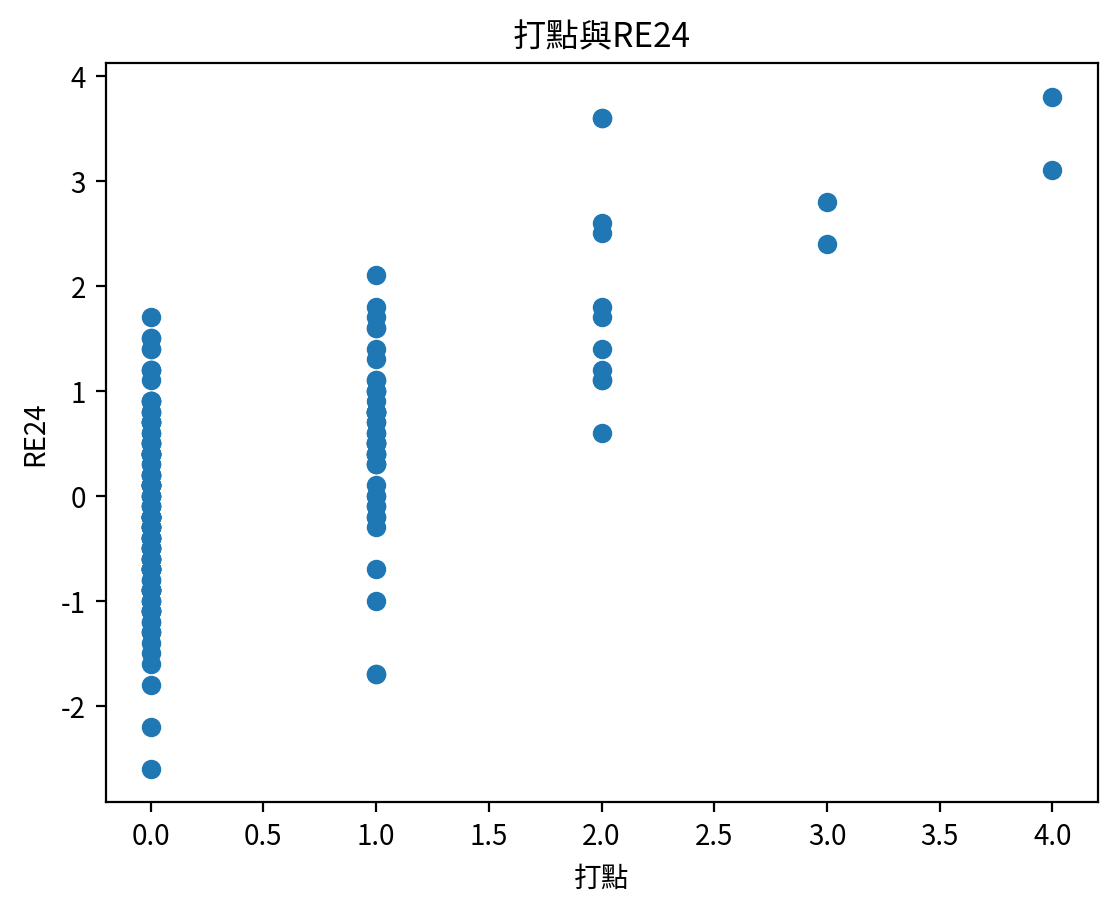

In [142]:
# 先抓出安打與RE24關係的散點圖

import matplotlib.pyplot as plt

x = new_df["打點"]
y = new_df["RE24"]

plt.scatter(x, y)
plt.xlabel("打點")
plt.ylabel("RE24")
plt.title("打點與RE24")
plt.show()

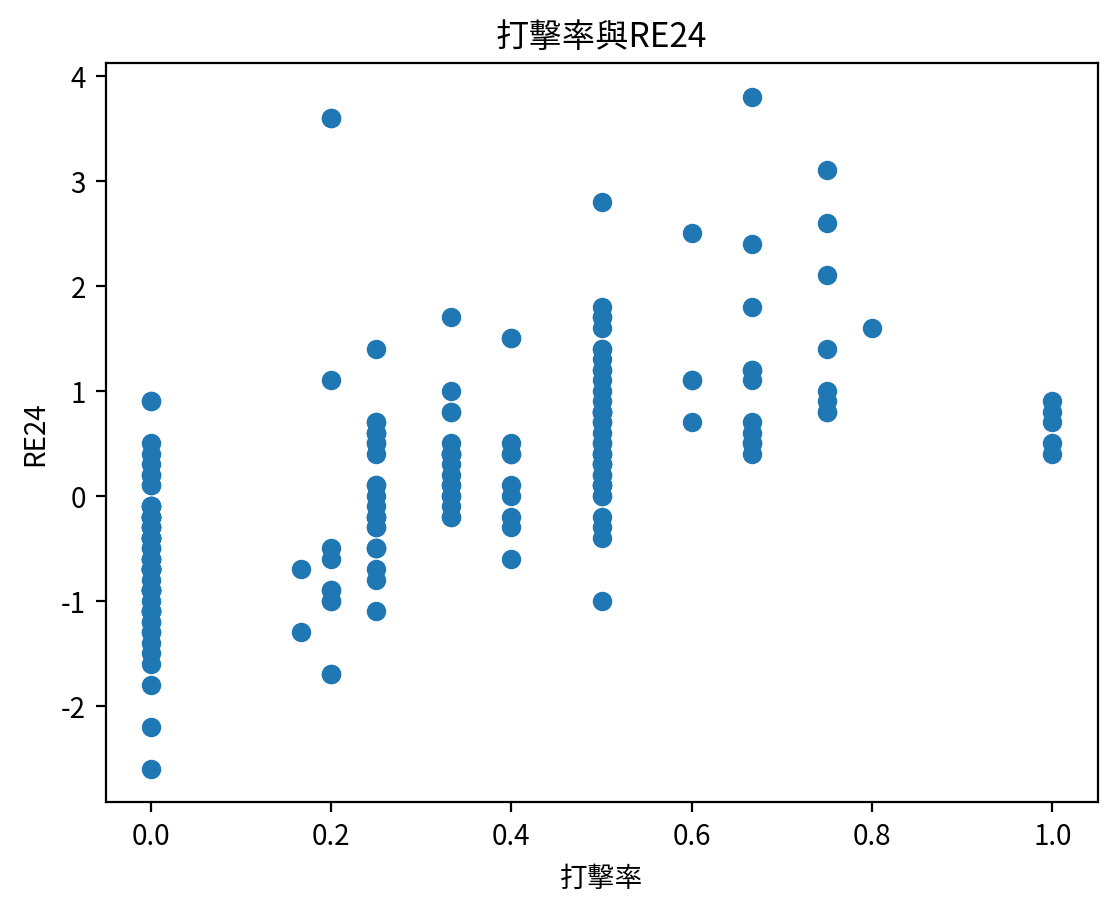

In [141]:
# 先抓出安打與RE24關係的散點圖

import matplotlib.pyplot as plt

x = new_df["打擊率"]
y = new_df["RE24"]

plt.scatter(x, y)
plt.xlabel("打擊率")
plt.ylabel("RE24")
plt.title("打擊率與RE24")
plt.show()

In [180]:
# 設定x,y
# 分割測試集跟訓練集

from sklearn.model_selection import train_test_split
x = new_df[[ '安打', '打點', '打擊率']]
y = new_df["RE24"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()

# 查看資料筆數
x_len = len(x)
x_train_len = len(x_train)
x_test_len = len(x_test)

print(f'總資料：{x_len}'), print(f'訓練集：{x_train_len}'), print(f'測試集：{x_test_len}')

總資料：199
訓練集：159
測試集：40


(None, None, None)

In [181]:
# 算出權重值跟偏誤值

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import pandas as pd

#test測試集
#train訓練集

std_x = StandardScaler()
x_train = std_x.fit_transform(x_train)
x_test = std_x.transform(x_test)
std_y = StandardScaler()
y_train = std_y.fit_transform(y_train.to_numpy().reshape(-1, 1))
y_test = std_y.transform(y_test.to_numpy().reshape(-1, 1))
lr = LinearRegression()
lr.fit(x_train, y_train)
print('權重值：{}'.format(lr.coef_))   #算出每一個X值的權重，負值是負相關
print('偏置值：{}'.format(lr.intercept_)) #偏誤值b

權重值：[[0.12248842 0.43918075 0.35161481]]
偏置值：[7.48552545e-17]


In [182]:
#查看預測值跟真實值的差別
#這邊可以畫成線性圖比較兩條線的差別

y_predict = std_y.inverse_transform(lr.predict(x_test))
y_real = std_y.inverse_transform(y_test)
for i in range(10):
  print('預測值：{}，真實值：{}'.format(y_predict[i], y_real[i]))

預測值：[-0.67533048]，真實值：[-0.7]
預測值：[0.59479582]，真實值：[0.3]
預測值：[-0.09028609]，真實值：[-0.2]
預測值：[0.1354171]，真實值：[0.]
預測值：[1.42850882]，真實值：[1.]
預測值：[0.49610921]，真實值：[0.4]
預測值：[-0.67533048]，真實值：[0.2]
預測值：[-0.20241135]，真實值：[-0.2]
預測值：[0.95558969]，真實值：[0.3]
預測值：[-0.20241135]，真實值：[0.1]


In [183]:
#平均方差越小越準確
#平均方差最小時的W與b值，就是最佳直線
#y_real 真實值
#y_predict 預測值

merror = mean_squared_error(y_real, y_predict)
print('平均方差：{}'.format(merror))

平均方差：0.1995778079044403


In [184]:
# 計算R-squared

from sklearn.metrics import r2_score

# 計算 R-squared
r2 = r2_score(y_real, y_predict)
print('R-squared：{}'.format(r2))

R-squared：0.7936100332557059


In [185]:
# 進行預測：
# 輸入X：

# 假設有新的打數數據，存儲在 new_data 中
import numpy as np

new_data = np.array([[1, 0.3, 0.3]]) 
print('預測數:',new_data)

# 將新數據進行標準化
new_data_standardized = std_x.transform(new_data)

# 使用模型進行預測
predicted_percentage = std_y.inverse_transform(lr.predict(new_data_standardized))

print('預測RE24：', predicted_percentage[0])

預測數: [[1.  0.3 0.3]]
預測RE24： [0.07065856]


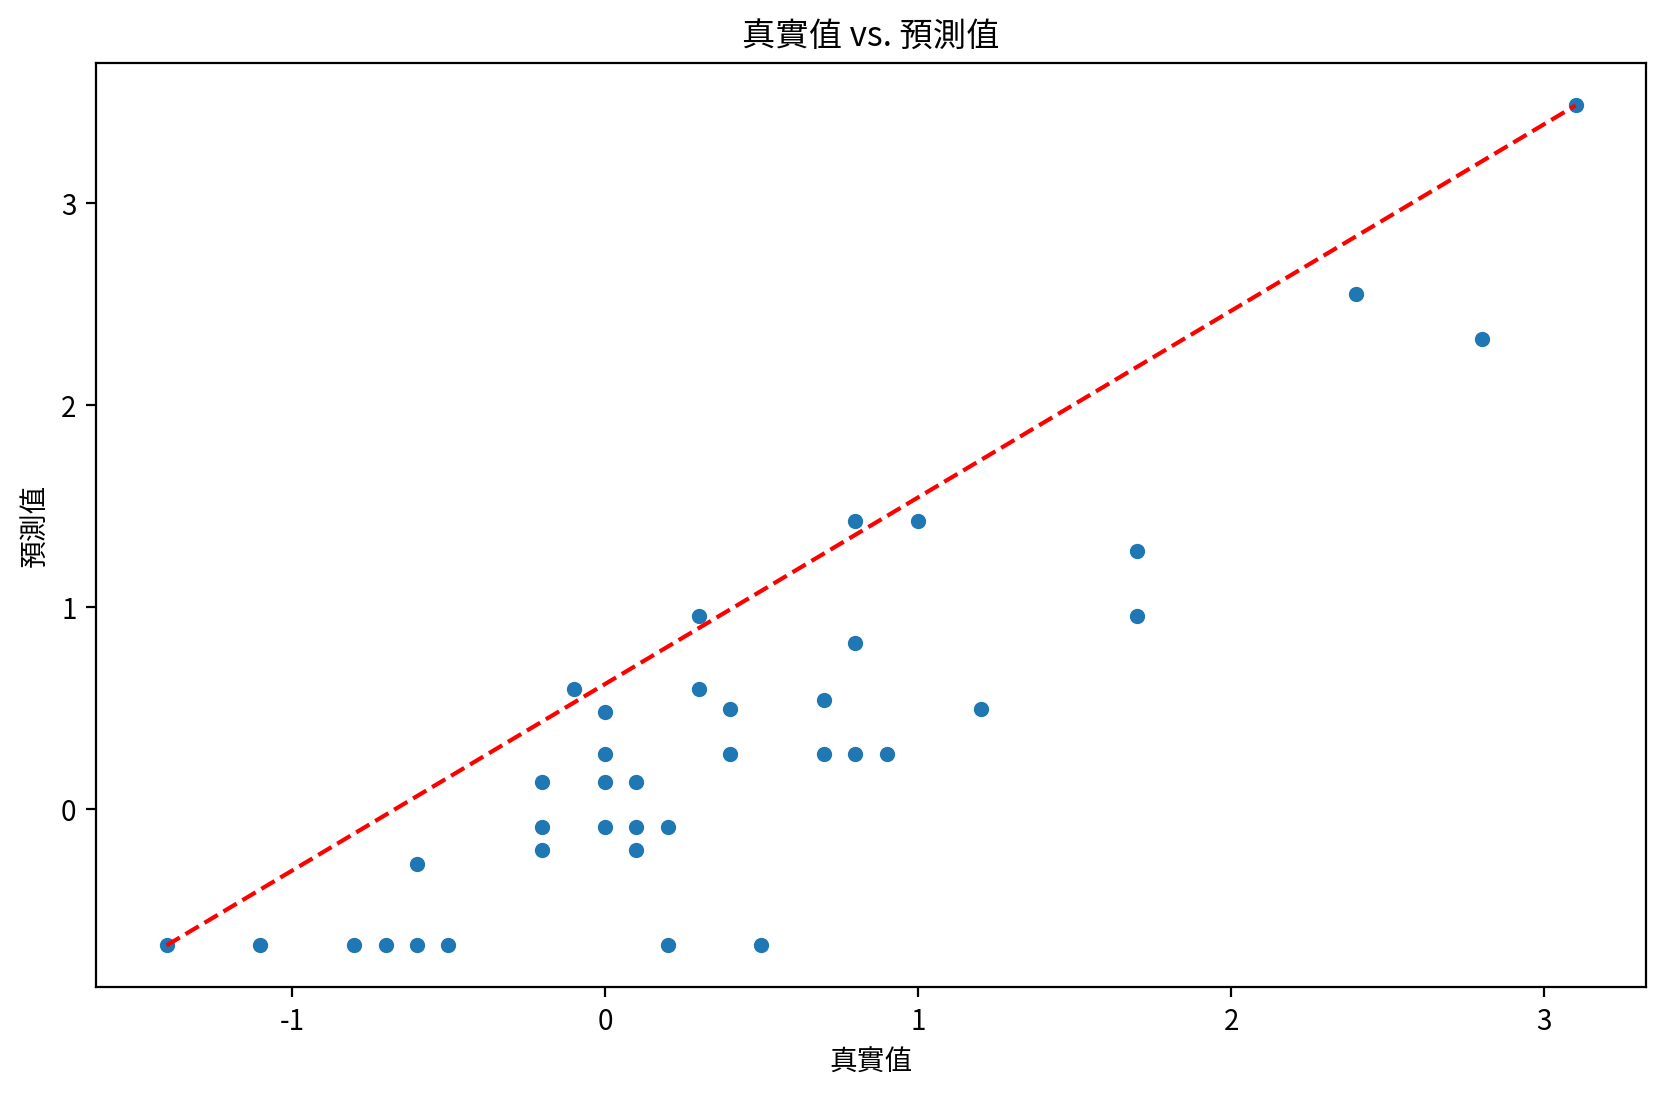

In [186]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 假設 y_real 是真實值，y_predict 是預測值
# 如果你的預測值是標準化過的，記得還原回原始值

# 將多維數組轉換為一維數組
y_real_flattened = np.ravel(y_real)
y_predict_flattened = np.ravel(y_predict)

plt.figure(figsize=(10, 6))

# 畫散點圖
sns.scatterplot(x=y_real_flattened, y=y_predict_flattened)

# 加入對角線，以方便比較
plt.plot(
    [min(y_real_flattened), max(y_real_flattened)],
    [min(y_predict_flattened), max(y_predict_flattened)],
    linestyle="--",
    color="red",
)

plt.title("真實值 vs. 預測值")
plt.xlabel("真實值")
plt.ylabel("預測值")

plt.show()

In [187]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_predict)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.20347446170804426


In [188]:
#相關係數

correlation = np.corrcoef(y_real.flatten(), y_predict.flatten())[0, 1]
print(f"Correlation Coefficient: {correlation}")

Correlation Coefficient: 0.8932057037348754


#### 情境解析

1. 梁家榮如果在前一天的比賽有一支安打、一分打點，那他的RE24預測是多少？
2. 現在一人出局有人在二壘，在預測的得分期望值下，你是教練團，用甚麼戰術比較適合？
3. 同時評估後面打者的得分期望值，如：廖健富(2023年例行賽RE24排名第一，平均單場比賽的RE24是多少)，如果下一棒是廖健富，那在無人出局、平手、一壘有人的前提下，是否要犧牲一個出局數，讓梁家榮短打避開雙殺機會，讓廖健富強攻？

https://drive.google.com/drive/folders/1fv3UDXA11DSBa2zv0KjcxfH0UtCWHCXO?fbclid=IwAR36ff__omiaBnL72BQFz3AQslnb83BYFWHCp56EuaPOPPcMX4H1kNmW1IU